# Case Study - Housing Price Prediction - Advanced Regression

## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house. 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
 

## 1. Data Analysis

Start with loading the data and doing exploratory analysis

In [1]:
# supress Warnings
import warnings
warnings.filterwarnings('ignore')


# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1500)

In [2]:
# load the data set
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# look for shapre
house_df.shape

(1460, 81)

In [4]:
# look for column details
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# stat review of the dataset
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking for percentage nulls
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Lookign at the above data we can see that certain variables have more than 80% missing values. Lets drop them
- Alley            93.77
- PoolQC           99.52
- Fence            80.75
- MiscFeature      96.30

In [7]:
house_df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace = True)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### WE can drop the ID column as well

In [8]:
house_df.drop(['Id'], axis=1,inplace = True)

In [9]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Looking at other variables which has NA individually in comparison with data dictionary to understand their importance and to decide if we need to keep them or drop them

In [10]:
house_df.shape

(1460, 76)

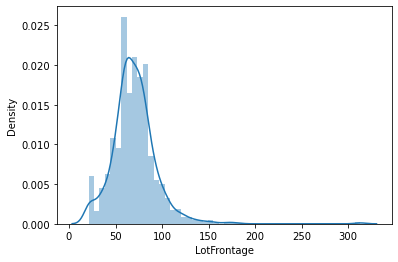

In [11]:
# LotFrontage - linear feet of street connected to property
sns.distplot(house_df.LotFrontage)
plt.show()

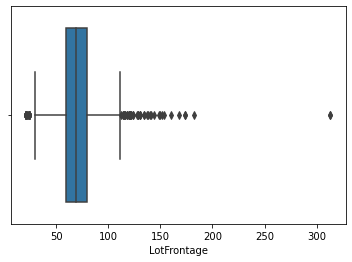

In [12]:
sns.boxplot(house_df.LotFrontage)
plt.show()

#### Since there are some outliers, lets replace NA with median as this might be something a buyer will look for

In [13]:
# Replace the null values with median values in LotFrontage column

house_df['LotFrontage'] = house_df['LotFrontage'].replace(np.nan, house_df['LotFrontage'].median())
house_df.LotFrontage.isnull().sum()

0

In [14]:
# FireplaceQu: Fireplace quality
house_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### There are 770 records which have a valid value for Fireplace. Now this might be an atraction for a house, hence lets not drop it, but instead of NA, lets fill in those records with a value as 'No Fireplace'

In [15]:
# replace NA with No Fireplace
house_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
house_df.FireplaceQu.isnull().sum()

0

In [16]:
# Garage columns. There are 5 Garage related columsn which have NA. Garage is very important criteria whcih determines the price. 
# We will not drop it but replace with 'No Garage'.

house_df.GarageType.value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [17]:
house_df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [18]:
house_df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [19]:
house_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
house_df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

#### Since there is a year column, we wll not replace it 'No Garage'

In [21]:
# Replace NA values in Garage columns with 'No Garage'. Leave GarageYrBlt
house_df.GarageCond.replace(np.nan,'No Garage',inplace=True)
house_df.GarageType.replace(np.nan,'No Garage',inplace=True)
house_df.GarageFinish.replace(np.nan,'No Garage',inplace=True)
house_df.GarageQual.replace(np.nan,'No Garage',inplace=True)

In [22]:
house_df.shape

(1460, 76)

#### After basic clean-up we have 1460 rows and 76 columns

In [23]:
# lets check the null values in the numerical data
house_df.select_dtypes(include=['int64','float']).isnull().sum()[house_df.select_dtypes(include=['int64','float']).isnull().sum()>0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [24]:
# Replace the null values with median values for MasVnrArea 
house_df['MasVnrArea'] = house_df['MasVnrArea'].replace(np.nan, house_df['MasVnrArea'].median())

In [25]:
# lets check the null values in the numerical data
house_df.select_dtypes(include=['int64','float']).isnull().sum()[house_df.select_dtypes(include=['int64','float']).isnull().sum()>0]

GarageYrBlt    81
dtype: int64

In [26]:
# replace the GarageYrBlt with 0
house_df['GarageYrBlt']=house_df['GarageYrBlt'].fillna(0)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].astype(int)

In [27]:
# lets check the null values in the numerical data
house_df.select_dtypes(include=['int64','float']).isnull().sum()[house_df.select_dtypes(include=['int64','float']).isnull().sum()>0]

Series([], dtype: int64)

In [28]:
# BsmtFinType1 - rating of basement finished area
house_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
# replace NA with No Basement
house_df.BsmtFinType1.replace(np.nan,'No Basement',inplace=True)
house_df.BsmtFinType1.isnull().sum()

0

In [30]:
#BsmtExposure - walkout or garden level walls.
house_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [31]:
# replace NA with No Basement
house_df.BsmtExposure.replace(np.nan,'No Basement',inplace=True)
house_df.BsmtExposure.isnull().sum()

0

In [32]:
# BsmtCond - condition of the basement.
house_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [33]:
# replace NA with No Basement
house_df.BsmtCond.replace(np.nan,'No Basement',inplace=True)
house_df.BsmtCond.isnull().sum()

0

In [34]:
# BsmtQual - height of the basement
house_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [35]:
# replace NA with No Basement
house_df.BsmtQual.replace(np.nan,'No Basement',inplace=True)
house_df.BsmtQual.isnull().sum()

0

In [36]:
# BsmtFinType2 - Rating of basement finished area (if multiple types)
house_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [37]:
# replace NA with No Basement
house_df.BsmtFinType2.replace(np.nan,'No Basement',inplace=True)
house_df.BsmtFinType2.isnull().sum()

0

In [38]:
# Checking for percentage nulls again
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

#### Still there are 2 more vzriables which needs to be corrected

In [39]:
# MasVnrType - masonry veneer type.
house_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
# replace NA with None
house_df['MasVnrType'].fillna('None', inplace=True) 
house_df.MasVnrType.isnull().sum()

0

In [41]:
# Electrical - properties type of Electrical system 
house_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
# Only 1 NA value in Electrical. Replacing NA value with mode
house_df.Electrical.replace(np.nan,house_df.Electrical.mode()[0],inplace=True)
house_df.Electrical.isnull().sum()

0

In [43]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house_df['IsRemodelled'] = house_df.apply(checkForRemodel, axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,0


In [44]:
# Create a new column BltOrRemodelAge and compute the age of the building

def getAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house_df['BltOrRemodelAge'] = house_df.apply(getAge, axis=1)
house_df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BltOrRemodelAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,0,8


In [45]:
# Create new column to indicate if the Garage is old or new.
# Garage Yr Built less than 2015 will be considered as old with value = 0 else new with value = 1 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageAge(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_df['OldOrNewGarage'] = house_df['GarageYrBlt'].apply(getGarageAge)
house_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,0,8,1


In [46]:
# Since we have created new cols from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt we can drop these cols
house_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [47]:
house_df.shape

(1460, 75)

#### WE have handled the null and empty variables. Next lets take a look at same value items. Lets decide to remove any columsn which have more than 85% same values

In [48]:
# function to get the count of same values
def sameValueCount():
    columnList = []
    cols=house_df.select_dtypes(['int64','float64','object']).columns
    for col in cols:
        if(house_df[col].value_counts().max() >= (0.85*1460)):
            columnList.append(col)
    return columnList

columnList = sameValueCount()

In [49]:
columnList

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType']

In [50]:
# drop above columns
house_df.drop(columnList, axis = 1, inplace = True)
house_df.shape

(1460, 48)

#### Next important step in data cleaning is outlier treatment to get a more correct model


### Outlier Treatment

In [51]:
# Checking outliers at 25%,50%,75%,90%,95%, 99%
house_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,1.000000,3.000000,757.100000,262.000000,130.000000,10.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,2.000000,3.000000,850.100000,335.000000,175.050000,11.000000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000


In [52]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   LotShape         1460 non-null   object 
 5   LotConfig        1460 non-null   object 
 6   Neighborhood     1460 non-null   object 
 7   BldgType         1460 non-null   object 
 8   HouseStyle       1460 non-null   object 
 9   OverallQual      1460 non-null   int64  
 10  OverallCond      1460 non-null   int64  
 11  RoofStyle        1460 non-null   object 
 12  Exterior1st      1460 non-null   object 
 13  Exterior2nd      1460 non-null   object 
 14  MasVnrType       1460 non-null   object 
 15  MasVnrArea       1460 non-null   float64
 16  ExterQual        1460 non-null   object 
 17  Foundation    

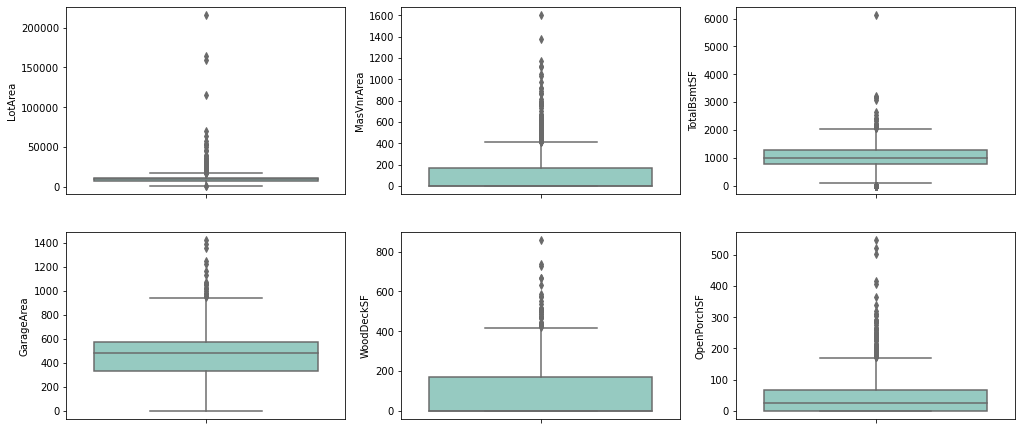

In [53]:
# Check the outliers in the major numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'GarageArea', palette='Set3', data = house_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_df)
plt.subplot(5,3,6)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_df)
plt.show()

In [54]:
# Removing Outliers

# Removing values beyond 98% for LotArea
qrtile_LotArea = house_df['LotArea'].quantile(0.98)
house_df = house_df[house_df["LotArea"] < qrtile_LotArea]

# Removing values beyond 98% for MasVnrArea
qrtile_MasVnrArea = house_df['MasVnrArea'].quantile(0.98)
house_df = house_df[house_df["MasVnrArea"] < qrtile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF
qrtile_TotalBsmtSF = house_df['TotalBsmtSF'].quantile(0.99)
house_df = house_df[house_df["TotalBsmtSF"] < qrtile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF
qrtile_WoodDeckSF = house_df['WoodDeckSF'].quantile(0.99)
house_df = house_df[house_df["WoodDeckSF"] < qrtile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF
qrtile_OpenPorchSF = house_df['OpenPorchSF'].quantile(0.99)
house_df = house_df[house_df["OpenPorchSF"] < qrtile_OpenPorchSF]

#### Now since the clean-up is complete we should move to the next step whcih is data visualization. This will help us understand the data more clearly

## Data Visualization

#### Lets start by looking at the distrinbution followed by Kurtosis and skewness of SalePrice col

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

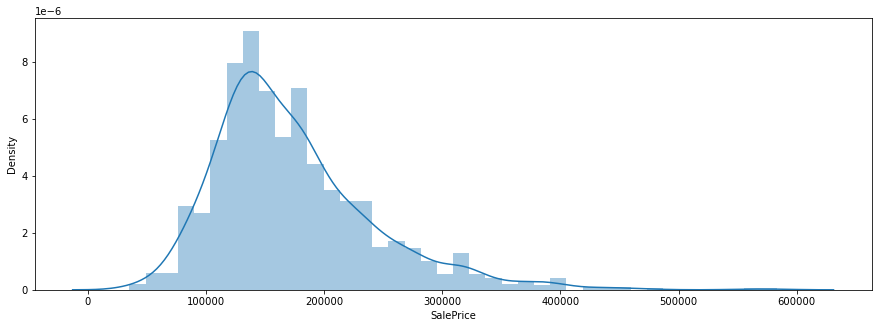

In [55]:
plt.figure(figsize=(15,5))
sns.distplot(house_df['SalePrice'])

In [56]:
# Skewness and Kurtosis calculation
print("Skewness: %f" % house_df['SalePrice'].skew())
print("Kurtosis: %f" % house_df['SalePrice'].kurt())

Skewness: 1.327274
Kurtosis: 2.931686


#### AS we we can see, col SalePrice is not normally distributed nd the distribution is right skewed.
#### To correct this we will transform it using log function

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

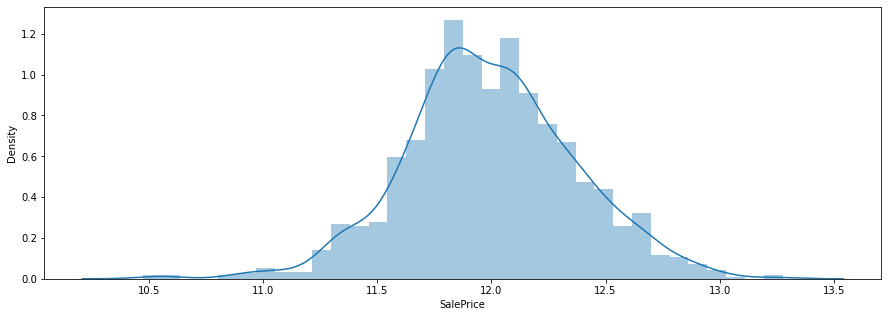

In [57]:
# Transformation using log function of sale price
house_df['SalePrice'] = np.log(house_df['SalePrice'])
                                 
plt.figure(figsize=(15,5))
sns.distplot(house_df['SalePrice'])

<Figure size 720x360 with 0 Axes>

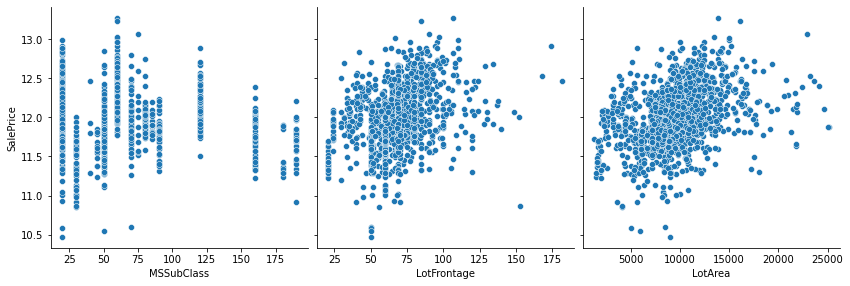

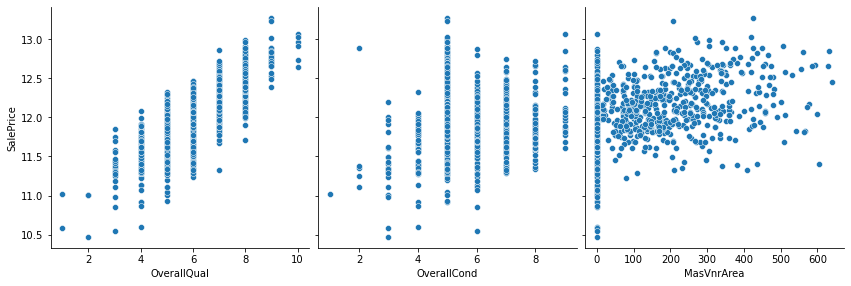

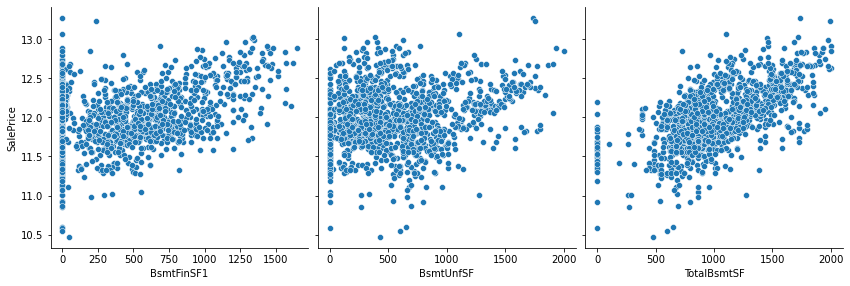

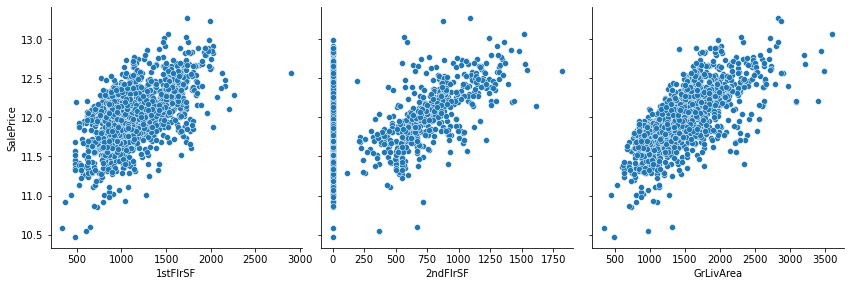

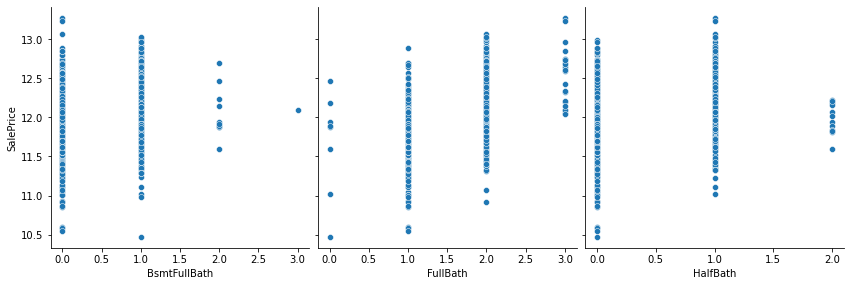

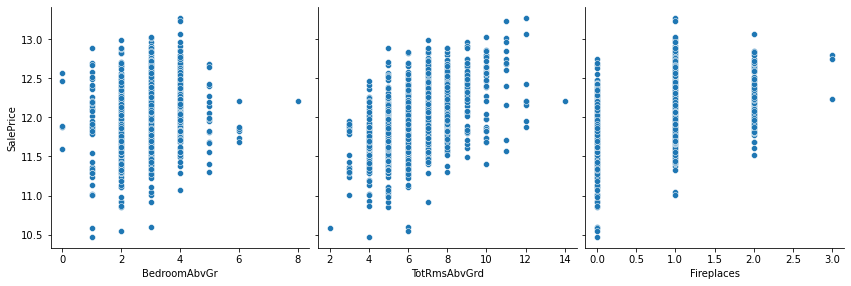

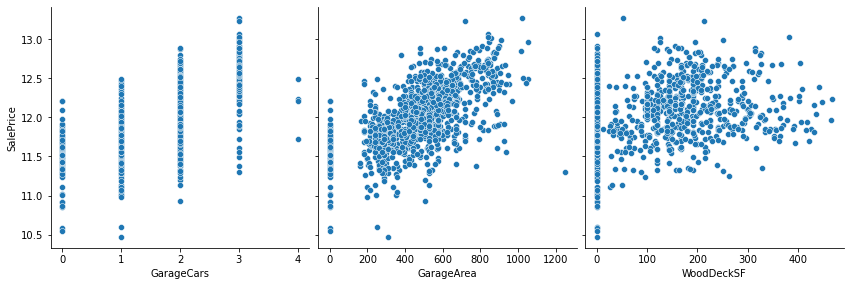

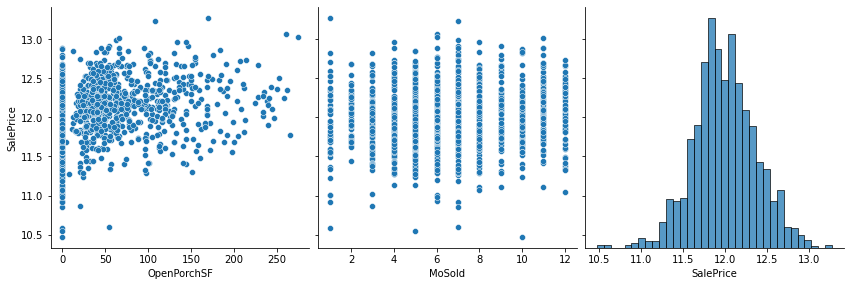

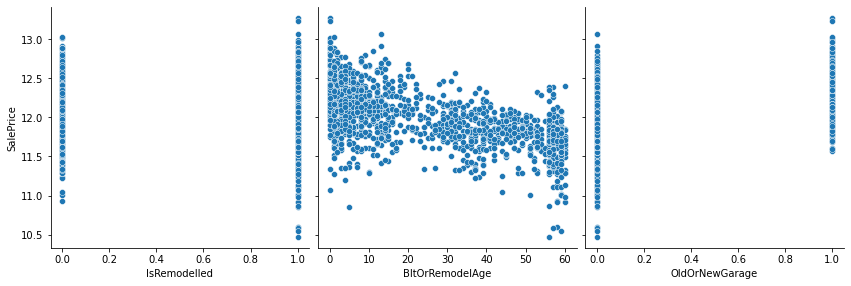

In [58]:
# visualization using pairplots
plt.figure(figsize=(10,5))
sns.pairplot(house_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['OpenPorchSF','MoSold','SalePrice'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['IsRemodelled','BltOrRemodelAge','OldOrNewGarage'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### There are no maojr observations which can be made from these plots as all of them as there are no patterns formed and they are scattered. Prooceed with additional analysis

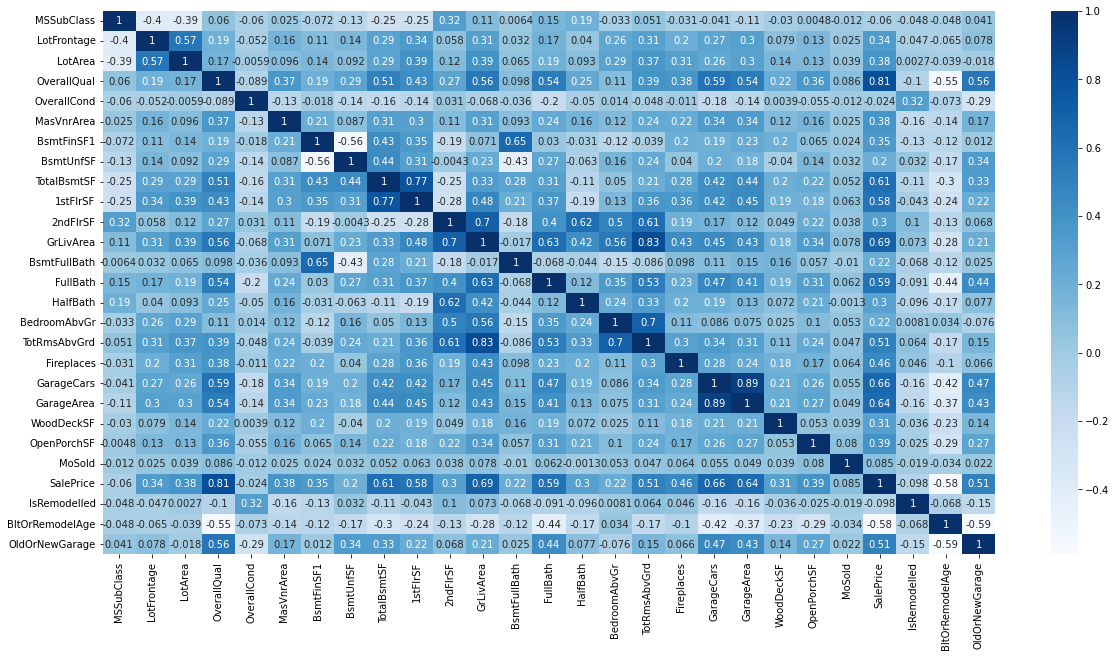

In [59]:
# Correlation analysis
plt.figure(figsize = (20, 10))
sns.heatmap(house_df.corr(), annot = True, cmap="Blues")
plt.show()

### Some of the observations are as follows
- TotRmsAbvGrd and GrLivArea are highly correlated at 83%
- GarageArea and GarageCars are highly correlated at 89%
#### Therefore these should be dropped.

In [60]:
# dropping the highly correlated cols
house_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [61]:
house_df.shape

(1358, 46)

Text(0, 0.5, 'Sq.Ft')

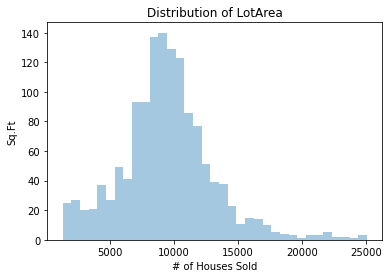

In [62]:
# Lot Area: In Square Feet
sns.distplot(house_df['LotArea'], kde=False).set_title("Distribution of LotArea")
plt.xlabel("# of Houses Sold")
plt.ylabel("Sq.Ft")


#### Max # of houses sold were 140 Sq.Ft

Text(0.5, 0, 'Month')

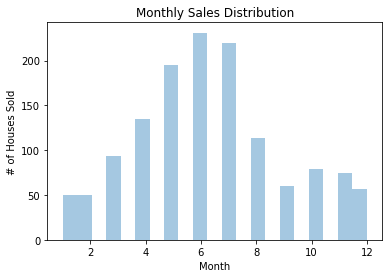

In [63]:
# MoSold: Year of the Month sold
sns.distplot(house_df['MoSold'], kde=False).set_title("Monthly Sales Distribution")
plt.ylabel("# of Houses Sold")
plt.xlabel("Month")

#### MAx # of houses were sold in the month of June, July

In [64]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'SaleCondition', 'SalePrice', 'IsRemodelled',
       'BltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

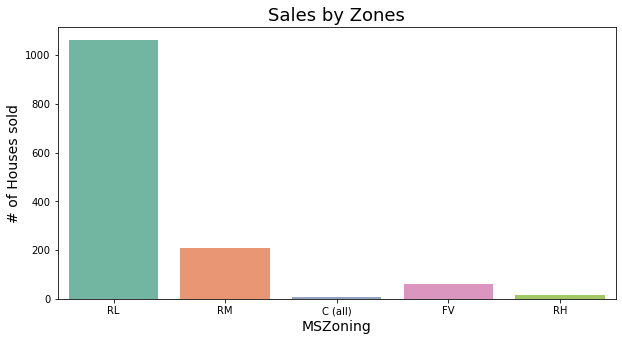

In [65]:
# Looking at differnt zones
plt.figure(figsize=(10,5))
sns.countplot(x="MSZoning", data=house_df, palette="Set2")
plt.title('Sales by Zones', fontsize=18)
plt.ylabel('# of Houses sold', fontsize=14)
plt.xlabel('MSZoning', fontsize=14)
plt.show()

#### Max # of houses were sold from Residential Low density Zone

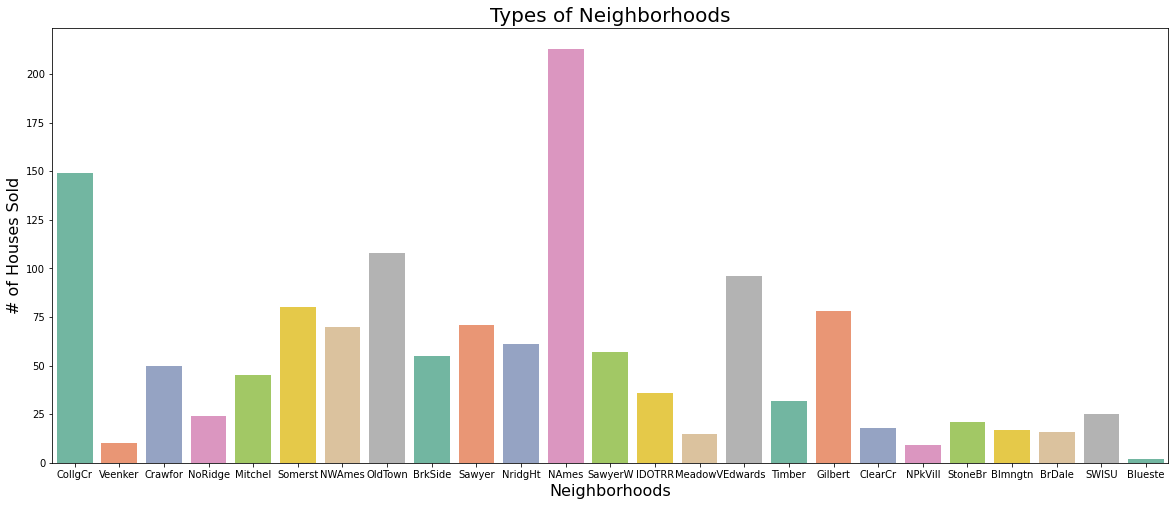

In [66]:
# looking at types of Neighbourhood
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x="Neighborhood", data=house_df, palette="Set2").set_title("Types of Neighborhoods", fontsize=20)
plt.xlabel("Neighborhoods", fontsize=16)
plt.ylabel("# of Houses Sold", fontsize=16)
plt.show()

#### Max # of houses were sold from North Ames neighborhood

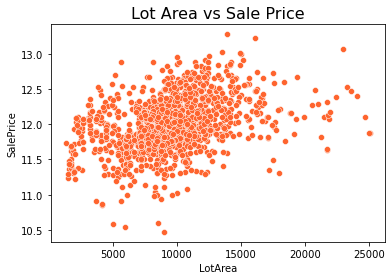

In [67]:
# looking at LotArea
#plt.subplot(122)
ax1 = sns.scatterplot(x="LotArea", y="SalePrice", data=house_df, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=16)
plt.show()

#### Lot area does not look like a major influence

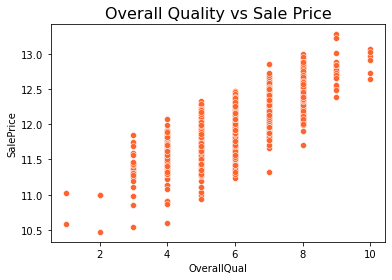

In [68]:
# looking at LotArea
#plt.subplot(122)
ax1 = sns.scatterplot(x="OverallQual", y="SalePrice", data=house_df, color='#FE642E')
ax1.set_title("Overall Quality vs Sale Price", fontsize=16)
plt.show()

#### With overall quality increasing the selling price also increases

## Data Preparation

Its time to start with data preparation. We will follow 2 major steps
- converting categorical data into numerical data
- Dummies

In [69]:
# items that cannot be ordered are categorised into 0 and 1
# items which can be ordered are given a sequence
house_df['d_LotShape'] = house_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_df['d_ExterQual'] = house_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_df['d_BsmtQual'] = house_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['d_BsmtExposure'] = house_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_df['d_BsmtFinType1'] = house_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
house_df['d_HeatingQC'] = house_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['d_KitchenQual'] = house_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['d_FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['d_GarageFinish'] = house_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_df['d_BldgType'] = house_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,'None': 0 })
house_df['d_HouseStyle'] = house_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_df['d_LotConfig'] = house_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,'None': 0  })
house_df['d_MasVnrType'] = house_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_df['d_SaleCondition'] = house_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,6.0,5,4,NaN,2.0,1,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5.0,5,3,3.0,2.0,1,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,6.0,5,4,3.0,2.0,1,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,5.0,4,4,4.0,1.0,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,6.0,5,4,3.0,2.0,1,4,2,1,1


In [70]:
# drop the old cols as those are not required anymore
house_df = house_df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle','LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,6.0,5,4,NaN,2.0,1,4,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5.0,5,3,3.0,2.0,1,1,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,6.0,5,4,3.0,2.0,1,4,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,5.0,4,4,4.0,1.0,1,4,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,6.0,5,4,3.0,2.0,1,4,2,1,1


#### Creating dummies

In [71]:
# dummies for MSZoning
d_MSZoning = pd.get_dummies(house_df['MSZoning'], prefix='MSZoning', drop_first = True)
house_df = pd.concat([house_df, d_MSZoning], axis = 1)

# dummies for Neighborhood
d_Neighborhood = pd.get_dummies(house_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
house_df = pd.concat([house_df, d_Neighborhood], axis = 1)

# dummies for RoofStyle
d_RoofStyle = pd.get_dummies(house_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
house_df = pd.concat([house_df, d_RoofStyle], axis = 1)

# dummies for Exterior1st
d_Exterior1st = pd.get_dummies(house_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
house_df = pd.concat([house_df, d_Exterior1st], axis = 1)

# dummies for Exterior2nd
d_Exterior2nd = pd.get_dummies(house_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house_df = pd.concat([house_df, d_Exterior2nd], axis = 1)

# dummies for Foundation
d_Foundation = pd.get_dummies(house_df['Foundation'], prefix='Foundation', drop_first = True)
house_df = pd.concat([house_df, d_Foundation], axis = 1)

# dummies for GarageType
d_GarageType = pd.get_dummies(house_df['GarageType'], prefix='GarageType', drop_first = True)
house_df = pd.concat([house_df, d_GarageType], axis = 1)

house_df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [72]:
# drop the below cols as dummies are created
house_df = house_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType'], axis=1)
house_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


# Train-Test-Split

In [73]:
# Assign feature variable to X
X = house_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [74]:
# Assign response variable to y
y = house_df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [75]:
# Check for NaN values in the DataFrame
nan_values = house_df.isna()

# Count the number of NaN values in each column
nan_count_per_column = house_df.isna().sum()

# Count the total number of NaN values in the entire DataFrame
total_nan_count = house_df.isna().sum().sum()

# Print the results
print("NaN values per column:")
print(nan_count_per_column)

print("\nTotal number of NaN values in the DataFrame:", total_nan_count)

NaN values per column:
MSSubClass                0
LotFrontage               0
LotArea                   0
OverallQual               0
OverallCond               0
MasVnrArea                0
BsmtFinSF1                0
BsmtUnfSF                 0
TotalBsmtSF               0
1stFlrSF                  0
2ndFlrSF                  0
GrLivArea                 0
BsmtFullBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
Fireplaces                0
GarageCars                0
WoodDeckSF                0
OpenPorchSF               0
MoSold                    0
SalePrice                 0
IsRemodelled              0
BltOrRemodelAge           0
OldOrNewGarage            0
d_LotShape                0
d_ExterQual               0
d_BsmtQual               37
d_BsmtExposure           38
d_BsmtFinType1           37
d_HeatingQC               0
d_KitchenQual             0
d_FireplaceQu           672
d_GarageFinish           79
d_BldgType               

In [ ]:
house_df['d_FireplaceQu'].head(20)

In [ ]:
house_df = house_df.fillna(0)

In [76]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_No Garage
dtypes: float64(8), int64(31), uint8(73)
memory usage: 521.2 KB


In [79]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',  'WoodDeckSF', 'OpenPorchSF']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF']])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
1046,0.053081,0.873993,1.844583,2.273154,-0.507964,0.960833,-0.400403,1752,2.605478,2.559945,...,1,0,0,0,0,0,1,0,0,0
1255,-0.183110,-0.839772,-0.860130,-0.035645,0.387335,-0.619561,0.051561,459,-0.337197,-0.479273,...,0,0,0,0,0,0,0,0,1,0
339,-0.891684,-0.112720,0.837204,-0.035645,1.282634,0.717695,0.442449,630,0.541887,0.273912,...,0,0,0,0,1,0,0,0,0,0
304,0.407368,0.977857,2.486594,0.733955,3.073232,-0.619561,-0.986735,1470,1.219127,1.627290,...,0,0,0,0,1,0,0,0,0,0
919,-0.891684,0.977857,0.459437,-0.035645,2.177933,-0.619561,0.303195,245,0.459556,0.859395,...,0,0,0,0,1,0,0,0,0,0


In [80]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
179,-0.612189,-0.515573,-0.303677,-0.712249,0.314962,-0.64125,-1.078165,968,-0.172638,-0.506597,...,0,0,0,0,0,0,0,0,1,0
1414,-0.137109,-0.312822,0.964212,0.021583,1.201201,-0.64125,-1.078165,833,-0.528192,-0.256732,...,0,0,0,0,0,0,0,0,1,0
870,-0.849729,-0.515573,-0.840704,-0.712249,-0.571276,-0.64125,-1.078165,894,-0.367534,-0.724127,...,0,0,0,0,0,0,0,0,1,0
569,0.813050,-0.059384,-0.719873,-0.712249,-0.571276,-0.64125,1.214708,0,-0.238482,-0.580087,...,0,0,0,0,0,0,0,0,1,0
814,-0.137109,-1.275888,-0.379756,-0.712249,1.201201,-0.64125,-1.078165,686,-0.915350,-1.335562,...,0,0,0,0,0,0,0,0,1,0


### Model Building and Evluation

In [81]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [82]:
# There seems to be some missing values in the training data which was observed at the bottom code. This piece of code was added
#later to find the missing values and handle them appropriately
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())

Missing values in X_train: 617
Missing values in y_train: 0


In [83]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 950
Number of samples in y_train: 950


In [87]:
# added the below piece of code as was getting an error on NaN while checking the mean_squared_error
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

NaN values in X_train: MSSubClass                0
LotFrontage               0
LotArea                   0
OverallQual               0
OverallCond               0
MasVnrArea                0
BsmtFinSF1                0
BsmtUnfSF                 0
TotalBsmtSF               0
1stFlrSF                  0
2ndFlrSF                  0
GrLivArea                 0
BsmtFullBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
Fireplaces                0
GarageCars                0
WoodDeckSF                0
OpenPorchSF               0
MoSold                    0
IsRemodelled              0
BltOrRemodelAge           0
OldOrNewGarage            0
d_LotShape                0
d_ExterQual               0
d_BsmtQual               27
d_BsmtExposure           27
d_BsmtFinType1           27
d_HeatingQC               0
d_KitchenQual             0
d_FireplaceQu           476
d_GarageFinish           60
d_BldgType                0
d_HouseStyle             

In [88]:
#X_train = X_train.dropna()
from sklearn.impute import SimpleImputer

# Identify columns with NaN values
columns_with_nan = ['d_BsmtQual','d_BsmtExposure','d_BsmtFinType1','d_FireplaceQu','d_GarageFinish']

# Create an imputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on X_test and transform the specified columns
X_train[columns_with_nan] = imputer.fit_transform(X_train[columns_with_nan])

In [89]:
print("Missing values in X_train:", X_train.isnull().sum().sum())

Missing values in X_train: 0


#### Since the number of records are differnt in X_train and y_train. We need to perform adjustments

In [90]:
#y_train = y_train[:len(X_train)]

In [91]:
#rechecking the count
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 950
Number of samples in y_train: 950


### Feature selection using RFE

#### FRom 111 we will select the best 75 features 

In [92]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE for top 75 variables
rfe = RFE(lm)  
rfe.n_features_to_select = 50
#X_train_selected = rfe.fit_transform(X_train, y_train)
rfe = rfe.fit(X_train, y_train)


In [93]:
print("Infinity values in X_train:", np.isinf(X_train).sum().sum())
print("Infinity values in y_train:", np.isinf(y_train).sum().sum())

Infinity values in X_train: 0
Infinity values in y_train: 0


In [94]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 50
Selected Features: [False False False  True  True False  True False  True  True  True  True
 False False False False False  True False False False False False  True
 False False  True False False False  True False False False False False
 False  True  True  True  True  True False  True False False  True False
  True  True  True  True  True  True  True  True False False  True  True
  True  True False False  True False False False False  True  True  True
  True  True  True False False False False False False False False  True
 False  True False False  True False False False False False False  True
 False False  True False  True  True  True False  True  True  True  True
 False  True False]
Feature Ranking: [47 46 15  1  1 60  1 62  1  1  1  1 31 29 28 54 40  1 42 43 55 30 58  1
 57 53  1 38 49 24  1 61 33 26 48 52 45  1  1  1  1  1 27  1 50  2  1 18
  1  1  1  1  1  1  1  1 59 25  1  1  1  1 34 22  1 44  6 14  5  1  1  1
  1  1  1 21 10 13 56  9 36 11  7  1 19  1 12 35  1

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 47),
 ('LotFrontage', False, 46),
 ('LotArea', False, 15),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 60),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 62),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('FullBath', False, 29),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 54),
 ('Fireplaces', False, 40),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 43),
 ('MoSold', False, 55),
 ('IsRemodelled', False, 30),
 ('BltOrRemodelAge', False, 58),
 ('OldOrNewGarage', True, 1),
 ('d_LotShape', False, 57),
 ('d_ExterQual', False, 53),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', False, 38),
 ('d_BsmtFinType1', False, 49),
 ('d_HeatingQC', False, 24),
 ('d_KitchenQual', True, 1),
 ('d_FireplaceQu', False, 61),
 ('d_GarageFinish', False, 33),
 ('d_BldgType', False, 26),
 ('d_HouseStyle', False, 48),
 ('d_LotConfig', 

In [96]:
# Assign the columns selected by RFE to cols
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,BsmtFinSF1,True,1
3,TotalBsmtSF,True,1
4,1stFlrSF,True,1
5,2ndFlrSF,True,1
6,GrLivArea,True,1
7,GarageCars,True,1
8,OldOrNewGarage,True,1
9,d_BsmtQual,True,1


In [97]:
# Assign the 75 columns to X_train_rfe
X_train_rfe = X_train[col]

In [98]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Performing Ridge regression

In [99]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Lets use Grid Search Cross Validation method to get the best value of hyperparameter alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# folds is 5
folds = 5

ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
ridge_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# lets verify the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.3,-0.081723,-0.087647,1
6,0.4,-0.081853,-0.087649,2
4,0.2,-0.081593,-0.087707,3
7,0.5,-0.081985,-0.087718,4
8,0.6,-0.082114,-0.087782,5
3,0.1,-0.081474,-0.087818,6
9,0.7,-0.082241,-0.087847,7
10,0.8,-0.082363,-0.087931,8
2,0.01,-0.081380,-0.087972,9
1,0.001,-0.081371,-0.087991,10


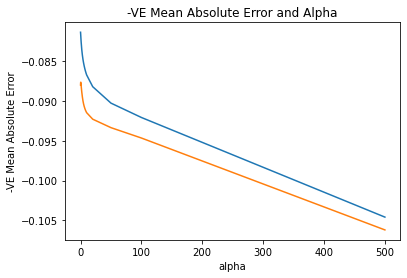

In [101]:
# visualizing mean test and train test scores with alpha
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], label='Train score')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], label='Test score')
plt.xlabel('alpha')
plt.ylabel('-VE Mean Absolute Error')
plt.title("-VE Mean Absolute Error and Alpha")
plt.show()

In [102]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=0.3)

In [103]:
#Let’s check out the coefficient values with alpha value as 10.
alpha=10.0
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[ 0.08550146  0.05798357  0.04662662  0.0468718   0.0333859   0.03838753
  0.08391765  0.05055717  0.0590529   0.0561783   0.04547382  0.07068479
  0.0807562   0.03289481  0.08753071 -0.01080451 -0.03671642 -0.02284265
 -0.05790875 -0.00480359 -0.07630222 -0.06705033 -0.03463059 -0.03246319
 -0.01638183 -0.03971502 -0.07601451 -0.03245487 -0.02496861 -0.02884911
 -0.01749412  0.01899153  0.00918018 -0.00543309 -0.03678857  0.03823142
 -0.01116614 -0.0435274   0.00819697 -0.01116614  0.01973824  0.03685253
  0.01956174  0.0570679   0.02909342 -0.01842123  0.05235533  0.02745308
  0.0687078   0.01898905]


In [104]:
# added the below piece of code as was getting an error on NaN while checking the mean_squared_error
print("NaN values in X_test:", np.isnan(X_test).sum())
print("Infinity values in X_test:", np.isinf(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())
print("Infinity values in y_test:", np.isinf(y_test).sum())

NaN values in X_test: OverallQual              0
OverallCond              0
BsmtFinSF1               0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
GarageCars               0
OldOrNewGarage           0
d_BsmtQual              10
d_KitchenQual            0
d_SaleCondition          0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Neighborhood_BrDale      0
Neighborhood_CollgCr     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
Neighborhood_NWAmes      0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Timber      0
RoofStyle_Mansard        0
RoofStyle_Shed           0
Exterior1st_AsphShn      0
Exterior1st_BrkComm      0
Exterior1st_BrkFace      0
Exteri

In [105]:
from sklearn.impute import SimpleImputer

# Identify columns with NaN values
columns_with_nan = ['d_BsmtQual']

# Create an imputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on X_test and transform the specified columns
X_test[columns_with_nan] = imputer.fit_transform(X_test[columns_with_nan])

In [106]:
print("NaN values in X_test:", np.isnan(X_test).sum())

NaN values in X_test: OverallQual             0
OverallCond             0
BsmtFinSF1              0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
GrLivArea               0
GarageCars              0
OldOrNewGarage          0
d_BsmtQual              0
d_KitchenQual           0
d_SaleCondition         0
MSZoning_FV             0
MSZoning_RH             0
MSZoning_RL             0
MSZoning_RM             0
Neighborhood_BrDale     0
Neighborhood_CollgCr    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Timber     0
RoofStyle_Mansard       0
RoofStyle_Shed          0
Exterior1st_AsphShn     0
Exterior1st_BrkComm     0
Exterior1st_BrkFace     0
Exterior1st_CBlock      0
Exterior1st_Wd S

In [107]:
# Checking the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.012412949002738635

In [108]:
# checking the R2 value for optimum alpha value:
alpha=10.0

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred_ridge= ridge.predict(X_train)
y_test_pred_ridge= ridge.predict(X_test)

print('train R2 score is',r2_score(y_train,y_train_pred_ridge))
print('test R2 score is',r2_score(y_test,y_test_pred_ridge))

train R2 score is 0.8988383951601286
test R2 score is 0.9027712130826806


### Train data has a R2 of 0.898 and test data has a score of 0.902. This indicates that its not overfitted and predicting ok

In [109]:
# Create a new df and assign the Features and coefficients to determine the top 10 significant features  

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values('Coefficient',ascending=False).head(10)

,Features,Coefficient
14,MSZoning_RL,0.0875
0,OverallQual,0.0855
6,GrLivArea,0.0839
12,MSZoning_FV,0.0808
11,d_SaleCondition,0.0707
48,GarageType_BuiltIn,0.0687
8,OldOrNewGarage,0.0591
1,OverallCond,0.0580
43,Foundation_PConc,0.0571
9,d_BsmtQual,0.0562


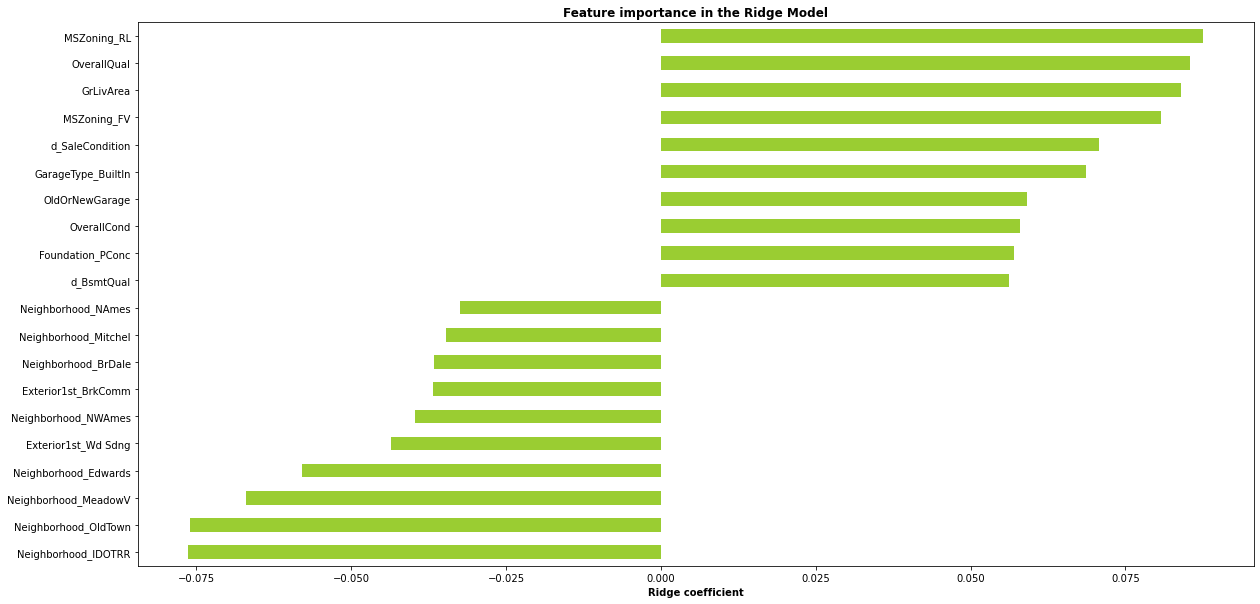

In [110]:
# Top 10 and least 10 Features
plt.figure(figsize=(20, 10))
r_coefs = pd.Series(ridge.coef_, index = X_train.columns)
r_imp_coefs = pd.concat([r_coefs.sort_values().head(10), r_coefs.sort_values().tail(10)])
r_imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Ridge coefficient", weight='bold')
plt.title("Feature importance in the Ridge Model", weight='bold')
plt.show()

## Performing Lasso Regression

In [111]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso, param_grid=params, scoring= 'r2', cv=folds, return_train_score=True, verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [112]:
# verifying the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0001,0.909687,0.890786,1
1,0.00001,0.910439,0.890758,2
0,0.000001,0.910448,0.890739,3
3,0.001,0.894602,0.883435,4
4,0.01,0.868854,0.860454,5
5,0.1,0.673456,0.664978,6
6,1,0.000000,-0.023803,7
7,10,0.000000,-0.023803,7
8,100,0.000000,-0.023803,7
9,500,0.000000,-0.023803,7


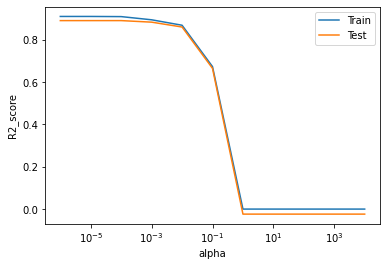

In [113]:
# visualizing mean test and train scoes with alpha 
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [114]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [115]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.07636316,  0.05411353,  0.0472764 ,  0.05009366, -0.00328824,
       -0.0023156 ,  0.12984929,  0.04398929,  0.05623735,  0.05830497,
        0.042778  ,  0.06369389,  0.39382873,  0.37002245,  0.40126816,
        0.29817611, -0.09506314, -0.04738715, -0.097734  , -0.02905631,
       -0.07964052, -0.16900167, -0.07756474, -0.07761606, -0.08170681,
       -0.08268926, -0.10306021, -0.08201698, -0.07079508, -0.0649629 ,
       -0.03763438,  0.04892194,  0.        , -0.        , -0.20785316,
        0.04597228, -0.05074241, -0.06723479,  0.00208425, -0.00375128,
        0.03924466,  0.0580815 ,  0.03581965,  0.0614172 ,  0.0689737 ,
       -0.06668956,  0.09273431,  0.09904965,  0.12104564,  0.05536396])

In [116]:
# Checking the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.013405459195536915

In [117]:
# checking the R2 value for optimum alpha value:
alpha=0.0001 #taking the value at 0.0001

lasso= Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_train_pred_lasso= lasso.predict(X_train)
y_test_pred_lasso= lasso.predict(X_test)

print('train R2 score is',r2_score(y_train,y_train_pred_lasso))
print('test R2 score is',r2_score(y_test,y_test_pred_lasso))

train R2 score is 0.9081727707708963
test R2 score is 0.8949970280741414


### Train data has a R2 of 0.908 and test data has a score of 0.894. This indicates that its not overfitted and predicting ok

In [118]:
# Create a new df and assign the Features and coefficients to determine the top 10 significant features 
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient',ascending=False).head(10)

,Features,Coefficient
14,MSZoning_RL,0.4013
12,MSZoning_FV,0.3938
13,MSZoning_RH,0.3700
15,MSZoning_RM,0.2982
6,GrLivArea,0.1298
46,GarageType_BuiltIn,0.1210
45,GarageType_Basment,0.0990
44,GarageType_Attchd,0.0927
0,OverallQual,0.0764
42,Foundation_Slab,0.0690


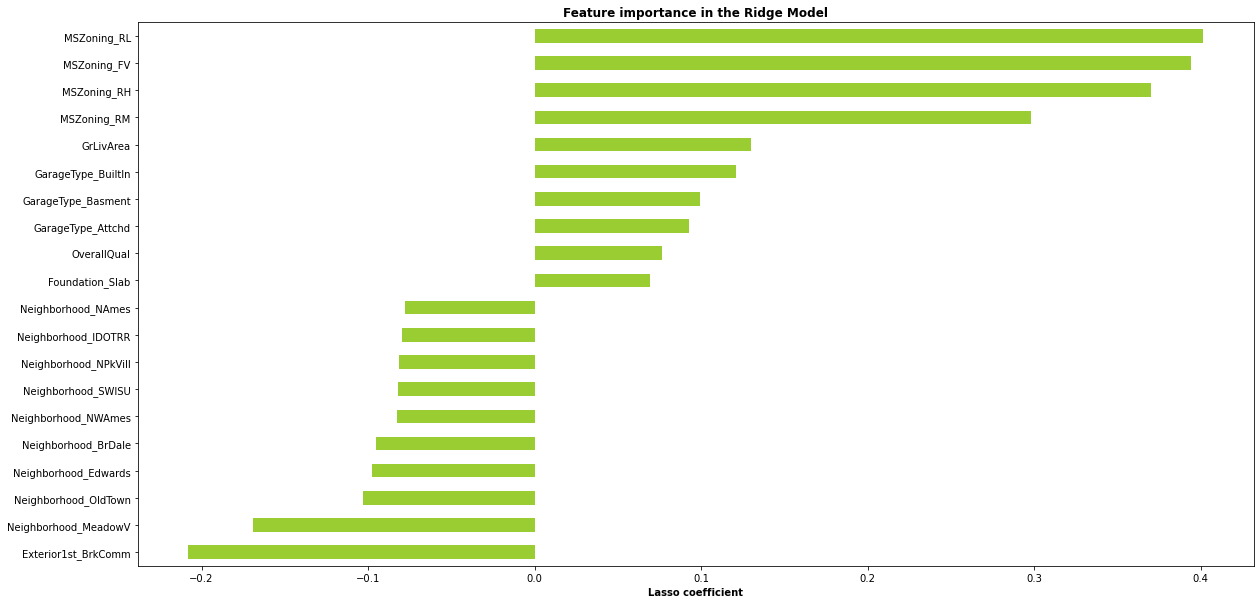

In [120]:
#Top 10 and bottom 10 Features
plt.figure(figsize=(20, 10))
L_coefs = pd.Series(lasso.coef_, index = X_train.columns)

L_imp_coefs = pd.concat([L_coefs.sort_values().head(10), L_coefs.sort_values().tail(10)])
L_imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Ridge Model", weight='bold')
plt.show()

## Lets conclude

#### 1. Lasso and Ridge Regression shows almost the same train and test R2 value which is 0.90 and 0.89
#### 2. The optimal lambda value in case of Ridge is 10 and Lasso is 0.0001
#### 3. The Mean Squared error in case of Ridge is 0.01241 and Lasso is 0.01340
#### 4. Given the Mean Squared Error (MSE) results, where Ridge has a lower MSE (0.01241) compared to Lasso (0.01340), Ridge might be a better choice. However, If interpretability is a priority and you want to identify a subset of important features, Lasso might be preferred despite a slightly higher MSE.
#### 5. We will go with Ridge

### Based on Ridge, the classifiers are Zones, Overall Quality, Above ground living area sq.ft., sale condition, Garage Type, Overall condition of the house, Foundation of the house, Basement quality (height of basement)